# -----------------------------------------------------------------------------

# Importing Core Libraries

# -----------------------------------------------------------------------------

In [1]:
# Importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------------------------

# Data Exploration

# -----------------------------------------------------------------------------

In [2]:
# Loading the dataset (This is "News_Categories.csv", 
# I renamed it to dataset.csv for simplicity purposes)
df = pd.read_csv('dataset.csv')

In [3]:
# The first 5 rows of the dataset
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,5/26/2018
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,5/26/2018
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,5/26/2018
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,5/26/2018
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",5/26/2018


In [4]:
# The last 5 rows of the dataset
df.tail()

,category,headline,authors,link,short_description,date
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,1/28/2012
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",1/28/2012
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",1/28/2012
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,1/28/2012
200852,SPORTS,Dwight Howard Rips Teammates After Magic Loss ...,NaN,https://www.huffingtonpost.com/entry/dwight-ho...,The five-time all-star center tore into his te...,1/28/2012


In [5]:
# Rows and Columns of the dataset
df.shape

(200853, 6)

In [6]:
# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200847 non-null  object
 2   authors            164233 non-null  object
 3   link               200853 non-null  object
 4   short_description  181141 non-null  object
 5   date               200853 non-null  object
dtypes: object(6)
memory usage: 10.7+ MB


In [7]:
# Statistical summary of the dataset
df.describe()

,category,headline,authors,link,short_description,date
count,200853,200847,164233,200853,181141,200853
unique,41,199343,27992,200812,178333,2309
top,POLITICS,Sunday Roundup,Lee Moran,https://www.huffingtonpost.comhttp://stylelike...,Welcome to the HuffPost Rise Morning Newsbrief...,4/24/2013
freq,32739,90,2423,2,192,100


In [8]:
# Checking for Null Values
df.isnull().sum()

category                 0
headline                 6
authors              36620
link                     0
short_description    19712
date                     0
dtype: int64

In [9]:
# Checking for Duplicates
df.duplicated().sum()

13

# -----------------------------------------------------------------------------

# Data Preparation

# -----------------------------------------------------------------------------

In [10]:
# Dropping Null Values
df = df.dropna()
df.isnull().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

In [11]:
# Dropping Duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [12]:
# Dropping unnecessary columns: authors, link, date
df = df.drop(['authors', 'link', 'date'], axis=1)

In [13]:
# Displaying the updated dataset
df

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...
200843,TECH,Good Games -- Is It possible?,I don't think people who play Zynga games are ...
200844,TECH,Google+ Now Open for Teens With Some Safeguards,"For the most part, teens' experience on Google..."
200845,TECH,Web Wars,"These ""Web Wars"" threaten to rage on for some ..."
200847,TECH,Watch The Top 9 YouTube Videos Of The Week,If you're looking to see the most popular YouT...


In [14]:
# Merging headline and short_description into one column called 'text'
df['text'] = df['headline'] + ' ' + df['short_description']

# Dropping headline and short_description columns because they are no longer needed
df = df.drop(['headline', 'short_description'], axis=1)

In [15]:
# Displaying the updated dataset
df

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
200843,TECH,Good Games -- Is It possible? I don't think pe...
200844,TECH,Google+ Now Open for Teens With Some Safeguard...
200845,TECH,"Web Wars These ""Web Wars"" threaten to rage on ..."
200847,TECH,Watch The Top 9 YouTube Videos Of The Week If ...


In [16]:
# Displaying the unique categories
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'IMPACT', 'POLITICS', 'WEIRD NEWS',
       'WORLD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'LATINO VOICES', 'SCIENCE', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'WEDDINGS', 'FOOD & DRINK', 'DIVORCE', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [17]:
# Displaying the number of unique categories
df['category'].nunique()

41

In [18]:
# List of culture and arts categories
culture_arts_categories = ['ARTS', 'CULTURE & ARTS', 'ARTS & CULTURE']

# List of news categories
news_categories = ['WEIRD NEWS', 'WORLD NEWS', 'GOOD NEWS']

# List of voices categories
voices_categories = ['LATINO VOICES', 'BLACK VOICES', 'QUEER VOICES']

# Bundling the culture and arts categories into one category called 'CULTURE & ARTS'
df['category'] = df['category'].replace(culture_arts_categories, 'CULTURE & ARTS')

# Bundling the news categories into one category called 'NEWS'
df['category'] = df['category'].replace(news_categories, 'NEWS')

# Bundling the voices categories into one category called 'VOICES'
df['category'] = df['category'].replace(voices_categories, 'VOICES')

In [19]:
# Merging categories with the same or similar meaning
df['category'] = df['category'].replace('STYLE & BEAUTY', 'STYLE')
df['category'] = df['category'].replace('PARENTING', 'PARENTS')
df['category'] = df['category'].replace('COLLEGE', 'EDUCATION')
df['category'] = df['category'].replace('TASTE', 'FOOD & DRINK')
df['category'] = df['category'].replace('DIVORCE', 'WEDDINGS')
df['category'] = df['category'].replace('MONEY', 'BUSINESS')
df['category'] = df['category'].replace('HEALTHY LIVING', 'WELLNESS')
df['category'] = df['category'].replace('THE WORLDPOST', 'WORLDPOST')
df['category'] = df['category'].replace('WORLDPOST', 'NEWS')

In [20]:
# Dropping trash categories
trash_categories = ['GREEN', 'FIFTY']
df = df[~df['category'].isin(trash_categories)]

In [21]:
# Displaying the unique categories
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'IMPACT', 'POLITICS', 'NEWS', 'VOICES',
       'WOMEN', 'COMEDY', 'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH',
       'RELIGION', 'SCIENCE', 'EDUCATION', 'PARENTS', 'CULTURE & ARTS',
       'STYLE', 'FOOD & DRINK', 'WELLNESS', 'HOME & LIVING', 'WEDDINGS',
       'ENVIRONMENT'], dtype=object)

In [22]:
# Displaying the number of unique categories
df['category'].nunique()

24

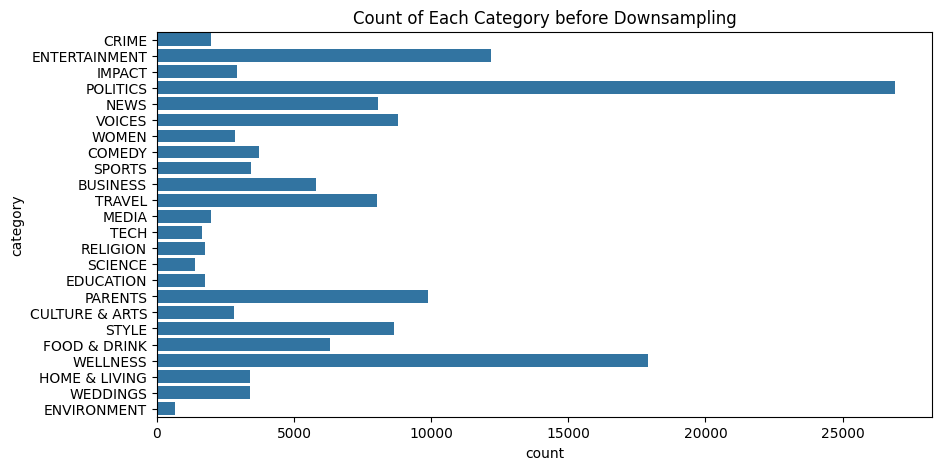

In [23]:
# Plotting the count of each category before Downsampling
plt.figure(figsize=(10, 5))
sns.countplot(df['category'])
plt.title('Count of Each Category before Downsampling')
plt.show()

In [24]:
# Downsampling
from sklearn.utils import resample

# Separating the dataset into different categories
politics = df[df['category'] == 'POLITICS']
wellness = df[df['category'] == 'WELLNESS']
entertainment = df[df['category'] == 'ENTERTAINMENT']
other_categories = df[(df['category'] != 'POLITICS') & 
                      (df['category'] != 'WELLNESS') & 
                      (df['category'] != 'ENTERTAINMENT')]

# Downsampling the categories with more than 10000 samples
politics = resample(politics, replace=False, n_samples=10000, random_state=42)
wellness = resample(wellness, replace=False, n_samples=10000, random_state=42)
entertainment = resample(entertainment, replace=False, n_samples=10000, random_state=42)

# Combining the downsampled categories back into a single dataframe
df_downsampled = pd.concat([politics, wellness, entertainment])

# Merging the downsampled dataframe with the dataframe of other categories
df = pd.concat([other_categories, df_downsampled])

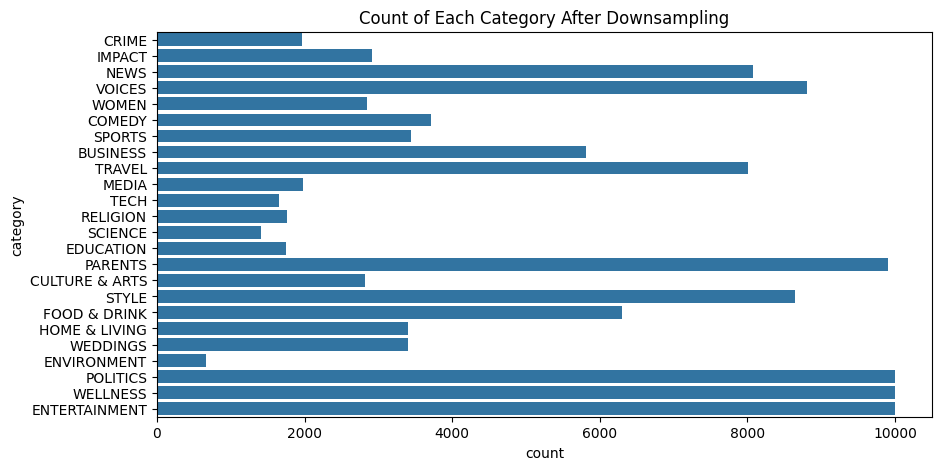

In [25]:
# Plotting the count of each category after downsampling
plt.figure(figsize=(10, 5))
sns.countplot(df['category'])
plt.title('Count of Each Category After Downsampling')
plt.show()

In [26]:
# Counting the number of samples in each category
category_counts = df['category'].value_counts()

# Getting a list of categories that have less than 6000 samples
categories_to_drop = category_counts[category_counts < 6000].index

# Dropping these categories from the dataframe
df = df[~df['category'].isin(categories_to_drop)]

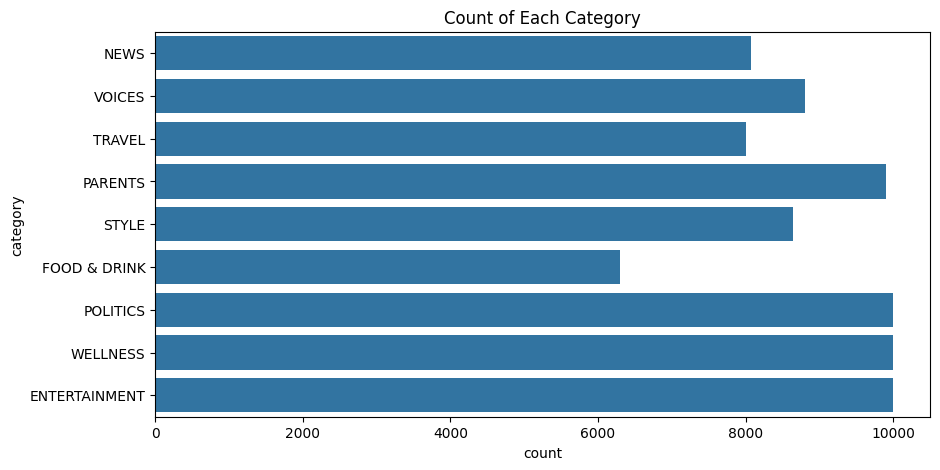

In [27]:
# Plotting the count of each category after dropping categories with less than 6000 samples
plt.figure(figsize=(10, 5))
sns.countplot(df['category'])
plt.title('Count of Each Category')
plt.show()

In [28]:
# Resetting the index
df = df.reset_index(drop=True)

In [29]:
# Displaying the updated dataset
df

,category,text
0,NEWS,Weird Father's Day Gifts Your Dad Doesn't Know...
1,NEWS,Mystery 'Wolf-Like' Animal Reportedly Shot In ...
2,NEWS,North Korea Still Open To Talks After Trump Ca...
3,NEWS,Thousands Travel Home To Ireland To Vote On Ab...
4,VOICES,Warriors Coach Steve Kerr Calls NFL Ban On Pro...
...,...,...
79732,ENTERTAINMENT,Jimmy Kimmel Coaxes Wild 48-Hour Marriage Stor...
79733,ENTERTAINMENT,Review: Captain America: The Winter Soldier Ri...
79734,ENTERTAINMENT,Aaron Eckhart Remembers Filming That 'Dark Kni...
79735,ENTERTAINMENT,"The â€˜Friends' Theme Song, Performed By Your ..."


# -----------------------------------------------------------------------------

# Data Pre-processing

# -----------------------------------------------------------------------------

# Language Detection

In [30]:
# # Importing the necessary library called "langdetect"
# from langdetect import detect

# # Function to detect the language
# def detect_language(text):
#     try:
#         return detect(text)
#     except:
#         return 'unknown'
    
# # Appling the function to the 'text' column
# df['language'] = df['text'].apply(detect_language)

# # Dropping the rows where the language is not English
# df = df[df['language'] == 'en']

# # Dropping the 'language' column
# df = df.drop('language', axis=1)

# # Reseting the index
# df = df.reset_index(drop=True)

# # Displaying the updated dataset
# df

# Normalization 

In [31]:
# Importing the library
import re
from unidecode import unidecode

# Function that Normalizes my 'text' column
def clean_text(text):
    
    # Converting text to lowercase
    text = text.lower()
    
    # Removing URLs    
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    # Replacing all diacritical marks with their corresponding characters
    text = unidecode(text)
    
    # Removing mentions
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)
    
    # Removing hashtags
    text = re.sub(r'#', '', text)
    
    # Removing new line characters
    text = re.sub(r'\n', '', text)
    
    # Removing punctuation and underscores
    text = re.sub(r'[^\w\s]|_', '', text)
    
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    
    # Trimming extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Returning the cleaned text
    return text

# Applying the clean_text function to the 'text' column
df['text'] = df['text'].apply(clean_text)

# Displaying the updated dataset
df

,category,text
0,NEWS,weird fathers day gifts your dad doesnt know h...
1,NEWS,mystery wolflike animal reportedly shot in mon...
2,NEWS,north korea still open to talks after trump ca...
3,NEWS,thousands travel home to ireland to vote on ab...
4,VOICES,warriors coach steve kerr calls nfl ban on pro...
...,...,...
79732,ENTERTAINMENT,jimmy kimmel coaxes wild hour marriage story o...
79733,ENTERTAINMENT,review captain america the winter soldier rive...
79734,ENTERTAINMENT,aaron eckhart remembers filming that dark knig...
79735,ENTERTAINMENT,the aEURfriends theme song performed by your f...


# Stopwords Removal

In [32]:
# Importing the library
import nltk
from nltk.corpus import stopwords

# Downloading the stopwords
nltk.download('stopwords')

# Getting the stopwords in English
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Applying the remove_stopwords function to the 'text' column
df['text'] = df['text'].apply(remove_stopwords)

# Display the updated dataset
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,text
0,NEWS,weird fathers day gifts dad doesnt know wants ...
1,NEWS,mystery wolflike animal reportedly shot montan...
2,NEWS,north korea still open talks trump cancels sum...
3,NEWS,thousands travel home ireland vote abortion ac...
4,VOICES,warriors coach steve kerr calls nfl ban protes...
...,...,...
79732,ENTERTAINMENT,jimmy kimmel coaxes wild hour marriage story a...
79733,ENTERTAINMENT,review captain america winter soldier riveting...
79734,ENTERTAINMENT,aaron eckhart remembers filming dark knight ho...
79735,ENTERTAINMENT,aEURfriends theme song performed favorite film...


# Lemmatization

In [33]:
# Importing the library
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Function to lemmatize the text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Applying the lemmatize_text function to the 'text' column
df['text'] = df['text'].apply(lemmatize_text)

# Displaying the updated dataset
df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,category,text
0,NEWS,weird father day gift dad doesnt know want buy...
1,NEWS,mystery wolflike animal reportedly shot montan...
2,NEWS,north korea still open talk trump cancel summi...
3,NEWS,thousand travel home ireland vote abortion acc...
4,VOICES,warrior coach steve kerr call nfl ban protest ...
...,...,...
79732,ENTERTAINMENT,jimmy kimmel coax wild hour marriage story aud...
79733,ENTERTAINMENT,review captain america winter soldier riveting...
79734,ENTERTAINMENT,aaron eckhart remembers filming dark knight ho...
79735,ENTERTAINMENT,aEURfriends theme song performed favorite film...


# Splitting Data

In [34]:
# Splitting the data into training, test sets
from sklearn.model_selection import train_test_split

# Splitting the data into X and Y
X = df['text'] # Feature
Y = df['category'] # Target

# Splitting the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# -----------------------------------------------------------------------------

# Vectorization

# -----------------------------------------------------------------------------

# BoW

In [35]:
# Importing the library
from sklearn.feature_extraction.text import CountVectorizer

# Initializing the CountVectorizer
cv = CountVectorizer()

# Transforming the training data
X_train_bow = cv.fit_transform(X_train)

# Transforming the test data
X_test_bow = cv.transform(X_test)

# TF-IDF

In [36]:
# Importing the library
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TfidfVectorizer
tv = TfidfVectorizer()

# Transforming the training data
X_train_tv = tv.fit_transform(X_train)

# Transforming the test data
X_test_tv = tv.transform(X_test)

# Hashing Vectorization

In [37]:
# Importing the library
from sklearn.feature_extraction.text import HashingVectorizer

# Initializing the HashingVectorizer
hv = HashingVectorizer(n_features=2**20, alternate_sign=False)

# Transforming the training data
X_train_hv = hv.fit_transform(X_train)

# Transforming the test data
X_test_hv = hv.transform(X_test)

# -----------------------------------------------------------------------------

# Models

# -----------------------------------------------------------------------------

# Multinomial Naive Bayes

In [38]:
# Importing the library
from sklearn.naive_bayes import MultinomialNB

# Initializing the Multinomial Naive Bayes Classifier 
# For each Vectorizer Technique
nb_bow = MultinomialNB()
nb_tv = MultinomialNB()
nb_hv = MultinomialNB()

# Training the models
# For each Vectorizer Technique
nb_bow.fit(X_train_bow, Y_train)
nb_tv.fit(X_train_tv, Y_train)
nb_hv.fit(X_train_hv, Y_train)

# Predictions using Multinomial Naive Bayes Classifier
# For each Vectorizer Technique
Y_pred_nb_bow = nb_bow.predict(X_test_bow)
Y_pred_nb_tv = nb_tv.predict(X_test_tv)
Y_pred_nb_hv = nb_hv.predict(X_test_hv)

# Logistic Regression

In [39]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# Initializing the Logistic Regression Classifier
# For each Vectorizer Technique
lr_bow = LogisticRegression(max_iter=1000)
lr_tv = LogisticRegression(max_iter=1000)
lr_hv = LogisticRegression(max_iter=1000)

# Train the models
# For each Vectorizer Technique
lr_bow.fit(X_train_bow, Y_train)
lr_tv.fit(X_train_tv, Y_train)
lr_hv.fit(X_train_hv, Y_train)

# Predictions using Logistic Regression Classifier
# For each Vectorizer Technique
Y_pred_lr_bow = lr_bow.predict(X_test_bow)
Y_pred_lr_tv = lr_tv.predict(X_test_tv)
Y_pred_lr_hv = lr_hv.predict(X_test_hv)

# Linear Support Vector Machine

In [40]:
# Linear Support Vector Machine Classifier
from sklearn.svm import LinearSVC

# Initialize the Linear Support Vector Machine Classifier
# For each Vectorizer Technique
svm_bow = LinearSVC(dual=False)
svm_tv = LinearSVC(dual=False)
svm_hv = LinearSVC(dual=False)

# Train the models
# For each Vectorizer Technique
svm_bow.fit(X_train_bow, Y_train)
svm_tv.fit(X_train_tv, Y_train)
svm_hv.fit(X_train_hv, Y_train)

# Predictions using Linear Support Vector Machine Classifier
# For each Vectorizer Technique
Y_pred_svm_bow = svm_bow.predict(X_test_bow)
Y_pred_svm_tv = svm_tv.predict(X_test_tv)
Y_pred_svm_hv = svm_hv.predict(X_test_hv)

# -----------------------------------------------------------------------------

# Model Evaluation

# -----------------------------------------------------------------------------

In [41]:
# Importing the libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Function for displaying report (evaluation metrics)
def report(Y_test, Y_pred):
    print('\nClassification Report:\n', classification_report(Y_test, Y_pred))
    accuracy = accuracy_score(Y_test, Y_pred)
    print('Accuracy:', accuracy)

# Function for displaying validation metrics
def validation(model, X, Y):
    accuracy = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    print('Cross Validation Accuracy:', accuracy.mean())

# Function for plotting the confusion matrix
def plot(Y_test, Y_pred):
    categories = df['category'].unique()
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Function for evaluating models
def evaluation(model, X_train, Y_train, Y_test, Y_pred, vectorizer_name):
    print(f'\nModel using {vectorizer_name}:')
    report(Y_test, Y_pred)
    validation(model, X_train, Y_train)
    plot(Y_test, Y_pred)
    print("-"*100)

NAIVE BAYES

Model using BoW:

Classification Report:
                precision    recall  f1-score   support

ENTERTAINMENT       0.76      0.76      0.76      2541
 FOOD & DRINK       0.85      0.77      0.81      1580
         NEWS       0.79      0.58      0.67      2042
      PARENTS       0.66      0.81      0.73      2419
     POLITICS       0.76      0.82      0.79      2537
        STYLE       0.86      0.82      0.84      2107
       TRAVEL       0.79      0.83      0.81      2037
       VOICES       0.74      0.61      0.67      2217
     WELLNESS       0.71      0.80      0.75      2455

     accuracy                           0.76     19935
    macro avg       0.77      0.76      0.76     19935
 weighted avg       0.76      0.76      0.76     19935

Accuracy: 0.7578128918986706
Cross Validation Accuracy: 0.7512625830493139


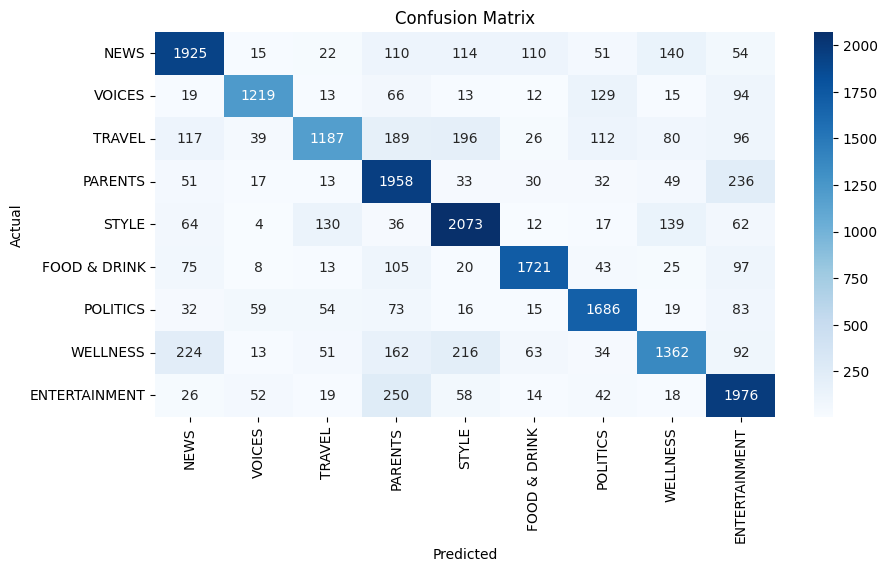

----------------------------------------------------------------------------------------------------

Model using TF-IDF:

Classification Report:
                precision    recall  f1-score   support

ENTERTAINMENT       0.74      0.78      0.76      2541
 FOOD & DRINK       0.90      0.67      0.77      1580
         NEWS       0.84      0.48      0.61      2042
      PARENTS       0.61      0.82      0.70      2419
     POLITICS       0.70      0.86      0.77      2537
        STYLE       0.87      0.78      0.83      2107
       TRAVEL       0.81      0.77      0.79      2037
       VOICES       0.79      0.54      0.64      2217
     WELLNESS       0.65      0.83      0.73      2455

     accuracy                           0.74     19935
    macro avg       0.77      0.73      0.73     19935
 weighted avg       0.76      0.74      0.73     19935

Accuracy: 0.7352896914973664
Cross Validation Accuracy: 0.726213172185299


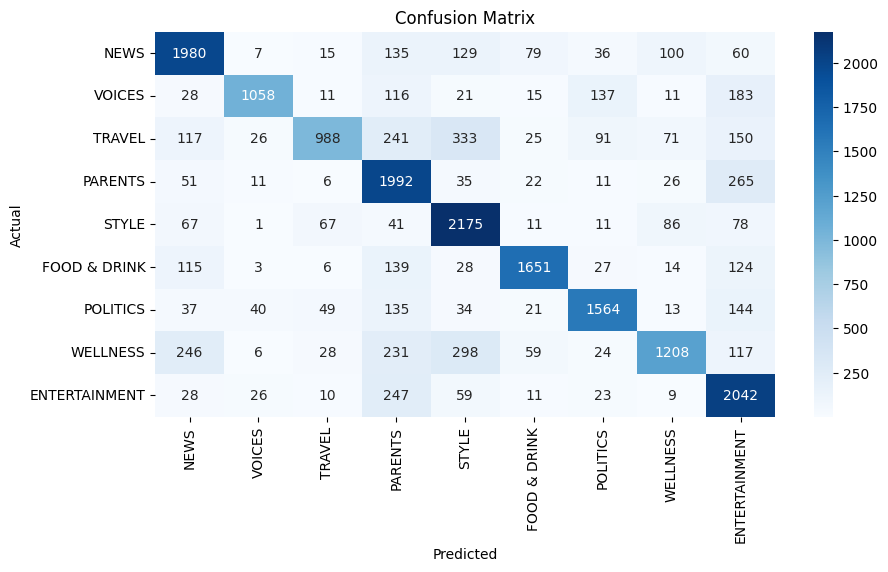

----------------------------------------------------------------------------------------------------

Model using Hashing Vectorizer:

Classification Report:
                precision    recall  f1-score   support

ENTERTAINMENT       0.73      0.75      0.74      2541
 FOOD & DRINK       0.93      0.51      0.66      1580
         NEWS       0.88      0.40      0.55      2042
      PARENTS       0.57      0.84      0.68      2419
     POLITICS       0.67      0.87      0.76      2537
        STYLE       0.88      0.76      0.82      2107
       TRAVEL       0.81      0.73      0.77      2037
       VOICES       0.81      0.49      0.61      2217
     WELLNESS       0.57      0.85      0.68      2455

     accuracy                           0.70     19935
    macro avg       0.76      0.69      0.70     19935
 weighted avg       0.75      0.70      0.70     19935

Accuracy: 0.7043391020817658
Cross Validation Accuracy: 0.6979700246537032


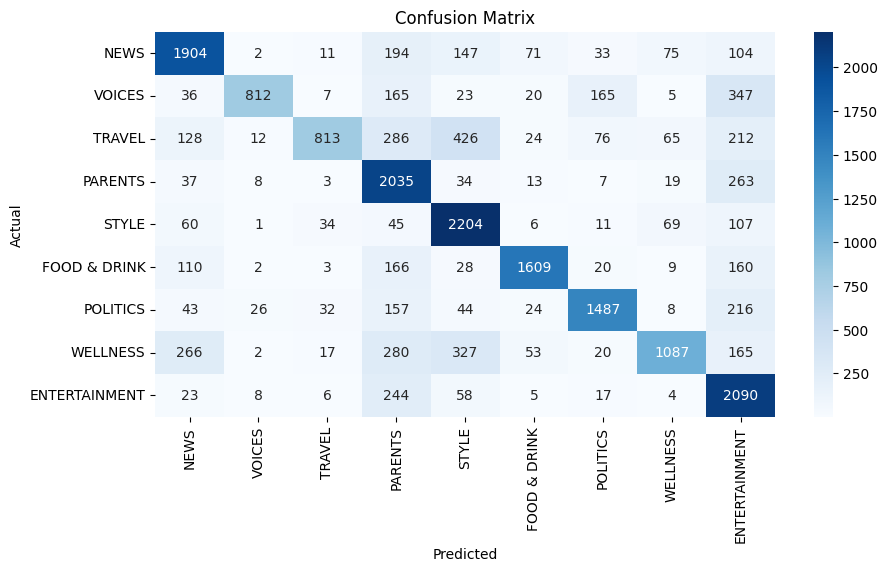

----------------------------------------------------------------------------------------------------


In [42]:
print('NAIVE BAYES')
evaluation(nb_bow, X_train_bow, Y_train, Y_test, Y_pred_nb_bow, 'BoW')
evaluation(nb_tv, X_train_tv, Y_train, Y_test, Y_pred_nb_tv, 'TF-IDF')
evaluation(nb_hv, X_train_hv, Y_train, Y_test,Y_pred_nb_hv, 'Hashing Vectorizer')

LOGISTIC REGRESSION

Model using BoW:

Classification Report:
                precision    recall  f1-score   support

ENTERTAINMENT       0.72      0.76      0.74      2541
 FOOD & DRINK       0.82      0.82      0.82      1580
         NEWS       0.68      0.67      0.67      2042
      PARENTS       0.75      0.76      0.76      2419
     POLITICS       0.76      0.79      0.77      2537
        STYLE       0.84      0.81      0.83      2107
       TRAVEL       0.83      0.79      0.81      2037
       VOICES       0.72      0.65      0.68      2217
     WELLNESS       0.72      0.77      0.75      2455

     accuracy                           0.76     19935
    macro avg       0.76      0.76      0.76     19935
 weighted avg       0.76      0.76      0.76     19935

Accuracy: 0.7572109355405067
Cross Validation Accuracy: 0.7511622150472872


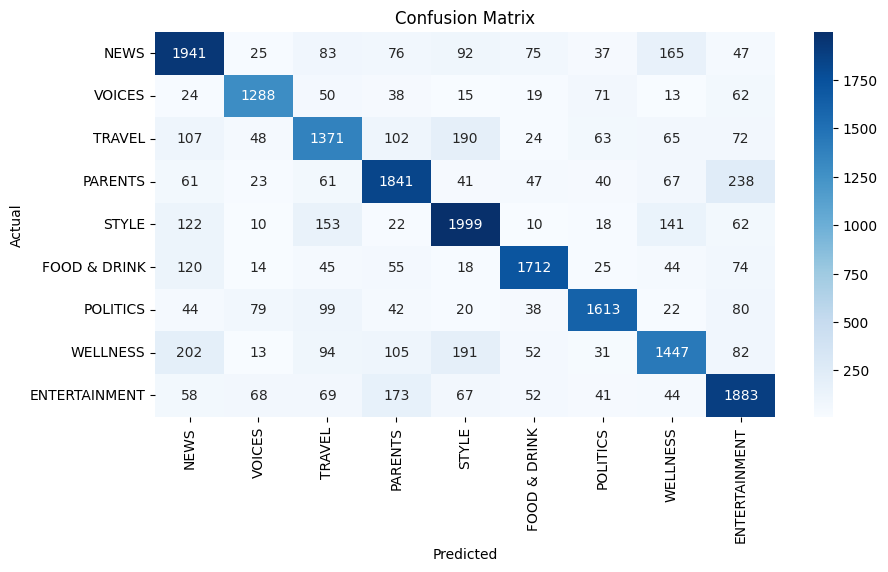

----------------------------------------------------------------------------------------------------

Model using TF-IDF:

Classification Report:
                precision    recall  f1-score   support

ENTERTAINMENT       0.73      0.79      0.76      2541
 FOOD & DRINK       0.85      0.81      0.83      1580
         NEWS       0.73      0.67      0.70      2042
      PARENTS       0.77      0.79      0.78      2419
     POLITICS       0.78      0.81      0.80      2537
        STYLE       0.86      0.83      0.84      2107
       TRAVEL       0.82      0.82      0.82      2037
       VOICES       0.78      0.64      0.70      2217
     WELLNESS       0.73      0.82      0.77      2455

     accuracy                           0.78     19935
    macro avg       0.78      0.78      0.78     19935
 weighted avg       0.78      0.78      0.78     19935

Accuracy: 0.7777276147479307
Cross Validation Accuracy: 0.7667469932240764


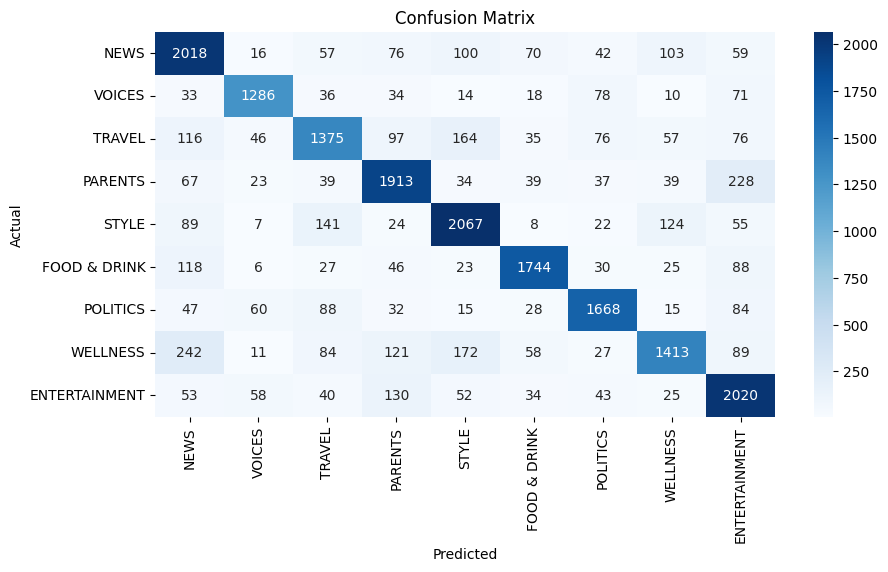

----------------------------------------------------------------------------------------------------

Model using Hashing Vectorizer:

Classification Report:
                precision    recall  f1-score   support

ENTERTAINMENT       0.71      0.77      0.74      2541
 FOOD & DRINK       0.84      0.80      0.82      1580
         NEWS       0.71      0.66      0.68      2042
      PARENTS       0.76      0.79      0.77      2419
     POLITICS       0.77      0.80      0.79      2537
        STYLE       0.85      0.82      0.83      2107
       TRAVEL       0.82      0.80      0.81      2037
       VOICES       0.77      0.62      0.69      2217
     WELLNESS       0.71      0.81      0.76      2455

     accuracy                           0.76     19935
    macro avg       0.77      0.76      0.77     19935
 weighted avg       0.77      0.76      0.76     19935

Accuracy: 0.7649360421369451
Cross Validation Accuracy: 0.7529013664532361


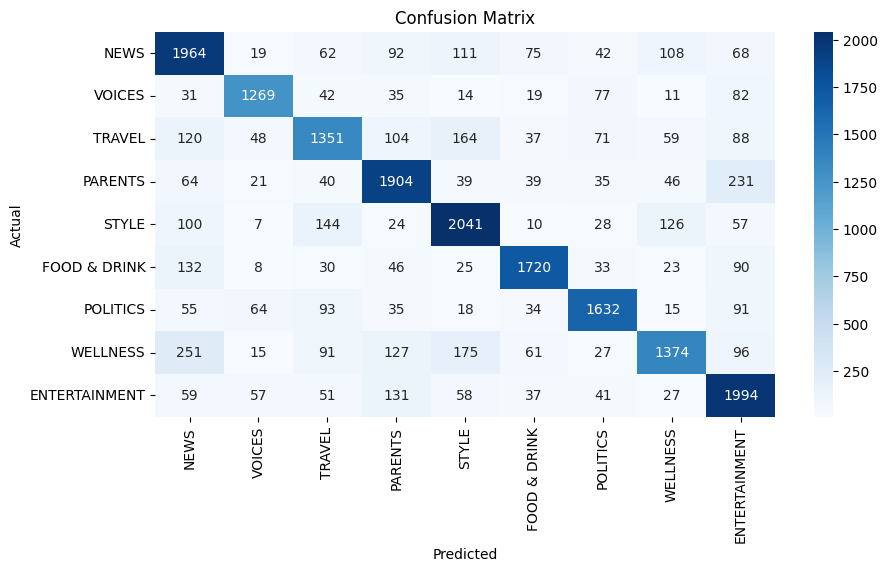

----------------------------------------------------------------------------------------------------


In [43]:
print('LOGISTIC REGRESSION')
evaluation(lr_bow, X_train_bow, Y_train, Y_test, Y_pred_lr_bow, 'BoW')
evaluation(lr_tv, X_train_tv, Y_train, Y_test, Y_pred_lr_tv, 'TF-IDF')
evaluation(lr_hv, X_train_hv, Y_train, Y_test, Y_pred_lr_hv, 'Hashing Vectorizer')

SVM

Model using BoW:

Classification Report:
                precision    recall  f1-score   support

ENTERTAINMENT       0.71      0.73      0.72      2541
 FOOD & DRINK       0.80      0.80      0.80      1580
         NEWS       0.65      0.63      0.64      2042
      PARENTS       0.71      0.74      0.72      2419
     POLITICS       0.73      0.76      0.75      2537
        STYLE       0.82      0.82      0.82      2107
       TRAVEL       0.80      0.76      0.78      2037
       VOICES       0.70      0.64      0.67      2217
     WELLNESS       0.69      0.72      0.70      2455

     accuracy                           0.73     19935
    macro avg       0.73      0.73      0.73     19935
 weighted avg       0.73      0.73      0.73     19935

Accuracy: 0.7305743666917481
Cross Validation Accuracy: 0.7205946639845944


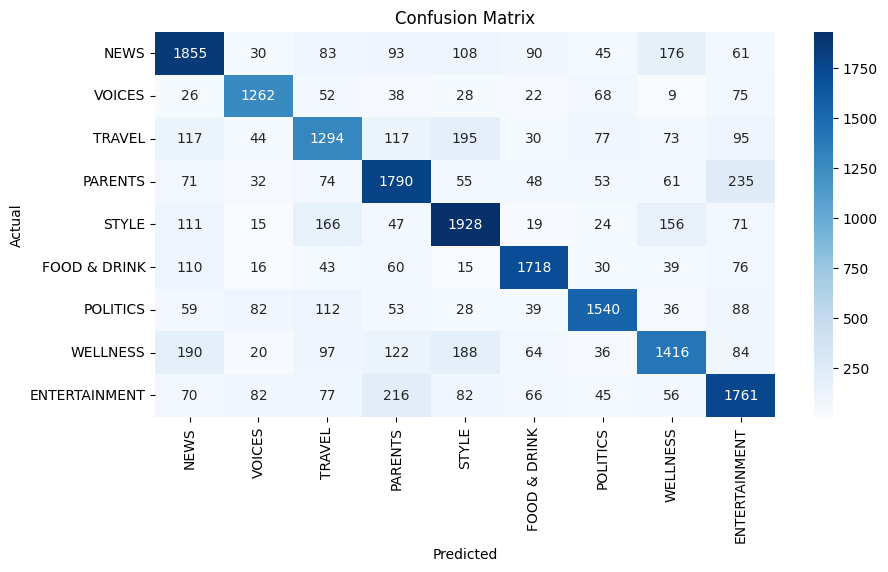

----------------------------------------------------------------------------------------------------

Model using TF-IDF:

Classification Report:
                precision    recall  f1-score   support

ENTERTAINMENT       0.75      0.78      0.76      2541
 FOOD & DRINK       0.84      0.83      0.84      1580
         NEWS       0.73      0.67      0.70      2042
      PARENTS       0.75      0.79      0.77      2419
     POLITICS       0.78      0.81      0.80      2537
        STYLE       0.84      0.84      0.84      2107
       TRAVEL       0.82      0.82      0.82      2037
       VOICES       0.77      0.66      0.71      2217
     WELLNESS       0.73      0.80      0.76      2455

     accuracy                           0.78     19935
    macro avg       0.78      0.78      0.78     19935
 weighted avg       0.78      0.78      0.78     19935

Accuracy: 0.7763732129420617
Cross Validation Accuracy: 0.7670144958293943


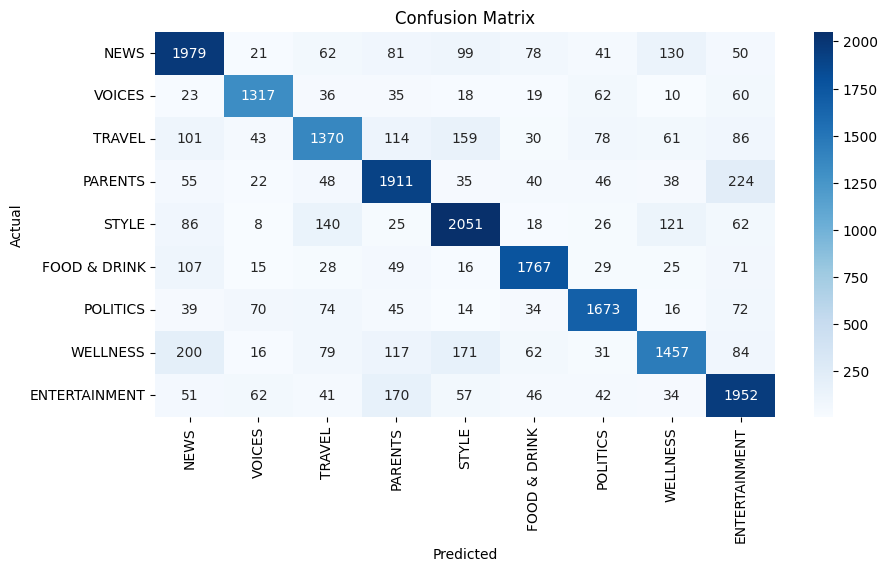

----------------------------------------------------------------------------------------------------

Model using Hashing Vectorizer:

Classification Report:
                precision    recall  f1-score   support

ENTERTAINMENT       0.75      0.78      0.76      2541
 FOOD & DRINK       0.83      0.84      0.83      1580
         NEWS       0.73      0.67      0.70      2042
      PARENTS       0.76      0.80      0.78      2419
     POLITICS       0.79      0.81      0.80      2537
        STYLE       0.84      0.84      0.84      2107
       TRAVEL       0.83      0.83      0.83      2037
       VOICES       0.77      0.65      0.71      2217
     WELLNESS       0.73      0.80      0.76      2455

     accuracy                           0.78     19935
    macro avg       0.78      0.78      0.78     19935
 weighted avg       0.78      0.78      0.78     19935

Accuracy: 0.7779784298971658
Cross Validation Accuracy: 0.7680512823308976


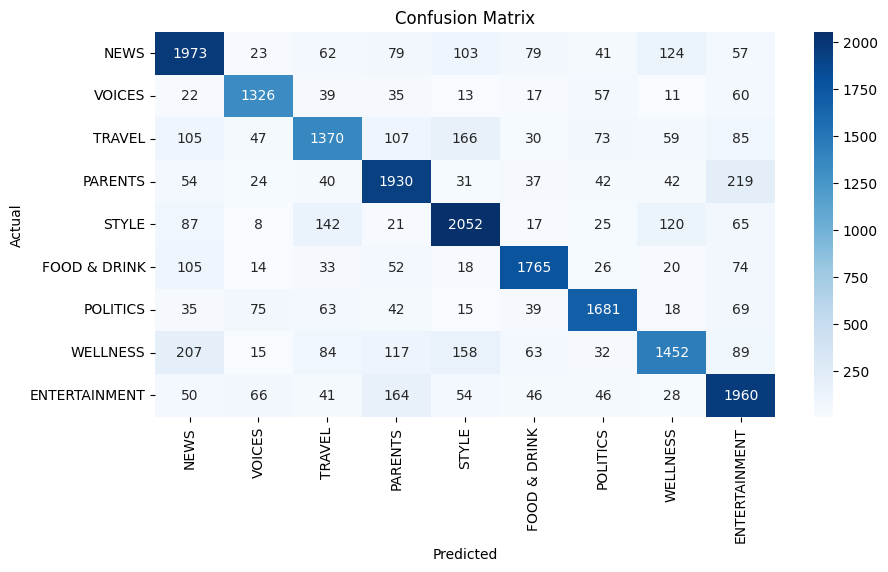

----------------------------------------------------------------------------------------------------


In [44]:
print('SVM')
evaluation(svm_bow, X_train_bow, Y_train, Y_test, Y_pred_svm_bow, 'BoW')
evaluation(svm_tv, X_train_tv, Y_train, Y_test, Y_pred_svm_tv, 'TF-IDF')
evaluation(svm_hv, X_train_hv, Y_train, Y_test, Y_pred_svm_hv, 'Hashing Vectorizer')

# -----------------------------------------------------------------------------

# Results 

# -----------------------------------------------------------------------------

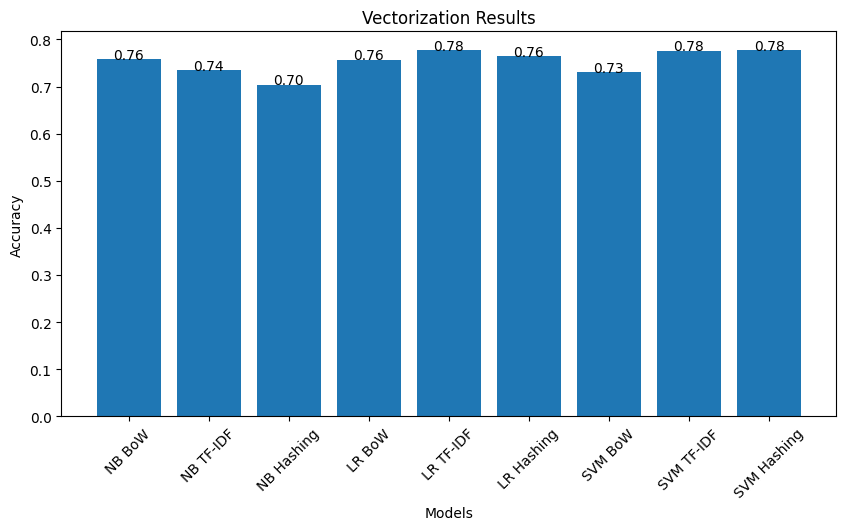

In [45]:
# Dictionary to store the results
vectorization_results = {
    'NB BoW': accuracy_score(Y_test, Y_pred_nb_bow),
    'NB TF-IDF': accuracy_score(Y_test, Y_pred_nb_tv),
    'NB Hashing': accuracy_score(Y_test, Y_pred_nb_hv),
    'LR BoW': accuracy_score(Y_test, Y_pred_lr_bow),
    'LR TF-IDF': accuracy_score(Y_test, Y_pred_lr_tv),
    'LR Hashing': accuracy_score(Y_test, Y_pred_lr_hv),
    'SVM BoW': accuracy_score(Y_test, Y_pred_svm_bow),
    'SVM TF-IDF': accuracy_score(Y_test, Y_pred_svm_tv),
    'SVM Hashing': accuracy_score(Y_test, Y_pred_svm_hv)
}

# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar(vectorization_results.keys(), vectorization_results.values())
plt.title('Vectorization Results')
plt.xlabel('Models')
plt.ylabel('Accuracy')
for key, value in vectorization_results.items():
    plt.text(key, value, f'{value:.2f}', ha='center')
plt.xticks(rotation=45)
plt.show()